In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Step 2: Load dataset
df = pd.read_csv("Modified_Chocolate_Sales.csv")

In [4]:
# Step 3: Create Date column from Year and Month
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df.sort_values('Date', inplace=True)


In [5]:
# Step 4: Drop missing values
df.dropna(inplace=True)

In [7]:
# Step 5: Define features and target
X = df[['Date', 'Product', 'Boxes Shipped']].copy()
X['Month'] = X['Date'].dt.month
X['Year'] = X['Date'].dt.year
X.drop(columns='Date', inplace=True)
y = df['Amount']

In [8]:
# Step 6: Preprocessing and pipeline setup
categorical_features = ['Product']
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [9]:
# Step 7: Time-based train-test split
split_index = int(0.8 * len(X))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [10]:
# Step 8: Train model
pipeline.fit(X_train, y_train)

C:\Users\divya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Product'])])),
                ('regressor', LinearRegression())])

In [11]:
# Step 9: Evaluate model
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [12]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 585650.22
R² Score: 0.69


In [13]:
# Step 10: Plot actual vs predicted
results_df = df.iloc[split_index:].copy()
results_df['Predicted_Amount'] = y_pred

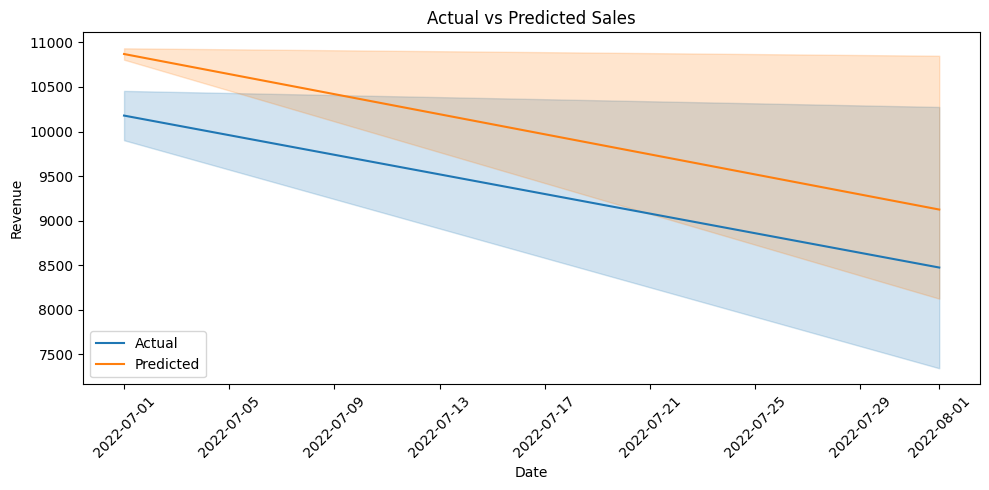

In [14]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='Amount', data=results_df, label='Actual')
sns.lineplot(x='Date', y='Predicted_Amount', data=results_df, label='Predicted')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
# Step 11: Forecast for next 6 months
last_date = df['Date'].max()
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=6, freq='MS')
products = df['Product'].unique()
avg_boxes = df.groupby('Product')['Boxes Shipped'].mean().to_dict()

future_data = []
for date in future_dates:
    for product in products:
        future_data.append({
            'Product': product,
            'Boxes Shipped': avg_boxes[product],
            'Month': date.month,
            'Year': date.year,
            'Date': date
        })

future_df = pd.DataFrame(future_data)
X_future = future_df[['Product', 'Boxes Shipped', 'Month', 'Year']]
future_df['Predicted_Amount'] = pipeline.predict(X_future)

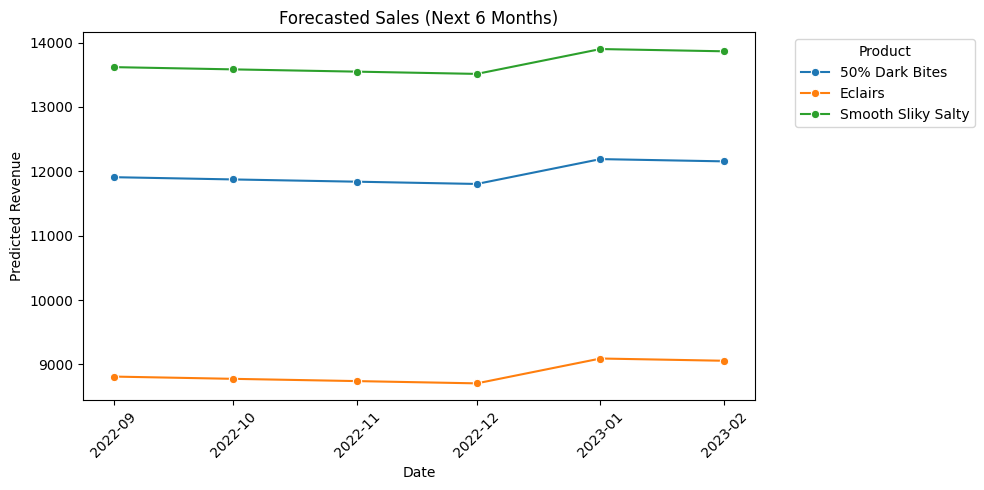

In [16]:
# Step 12: Plot forecast
plt.figure(figsize=(10, 5))
sns.lineplot(data=future_df, x='Date', y='Predicted_Amount', hue='Product', marker='o')
plt.title('Forecasted Sales (Next 6 Months)')
plt.xlabel('Date')
plt.ylabel('Predicted Revenue')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Step 13: Show tabular forecast
forecast_table = future_df[['Date', 'Product', 'Boxes Shipped', 'Predicted_Amount']]
print(forecast_table)

         Date             Product  Boxes Shipped  Predicted_Amount
0  2022-09-01      50% Dark Bites     160.378671      11908.865091
1  2022-09-01             Eclairs     148.287500       8811.614480
2  2022-09-01  Smooth Sliky Salty     150.890909      13618.401957
3  2022-10-01      50% Dark Bites     160.378671      11873.770445
4  2022-10-01             Eclairs     148.287500       8776.519834
5  2022-10-01  Smooth Sliky Salty     150.890909      13583.307311
6  2022-11-01      50% Dark Bites     160.378671      11838.675799
7  2022-11-01             Eclairs     148.287500       8741.425188
8  2022-11-01  Smooth Sliky Salty     150.890909      13548.212665
9  2022-12-01      50% Dark Bites     160.378671      11803.581152
10 2022-12-01             Eclairs     148.287500       8706.330541
11 2022-12-01  Smooth Sliky Salty     150.890909      13513.118019
12 2023-01-01      50% Dark Bites     160.378671      12189.622262
13 2023-01-01             Eclairs     148.287500       9092.37